# Concrete Slump Test - Regression 
### Introduction

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src=https://i.imgur.com/9bASXlF.jpg>
<img src= https://i.imgur.com/pazO4Cn.jpg>
Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**
 

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.shape

(103, 10)

In [5]:
df.isnull().any()

Cement                                False
Slag                                  False
Fly ash                               False
Water                                 False
SP                                    False
Coarse Aggr.                          False
Fine Aggr.                            False
SLUMP(cm)                             False
FLOW(cm)                              False
Compressive Strength (28-day)(Mpa)    False
dtype: bool

In [6]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

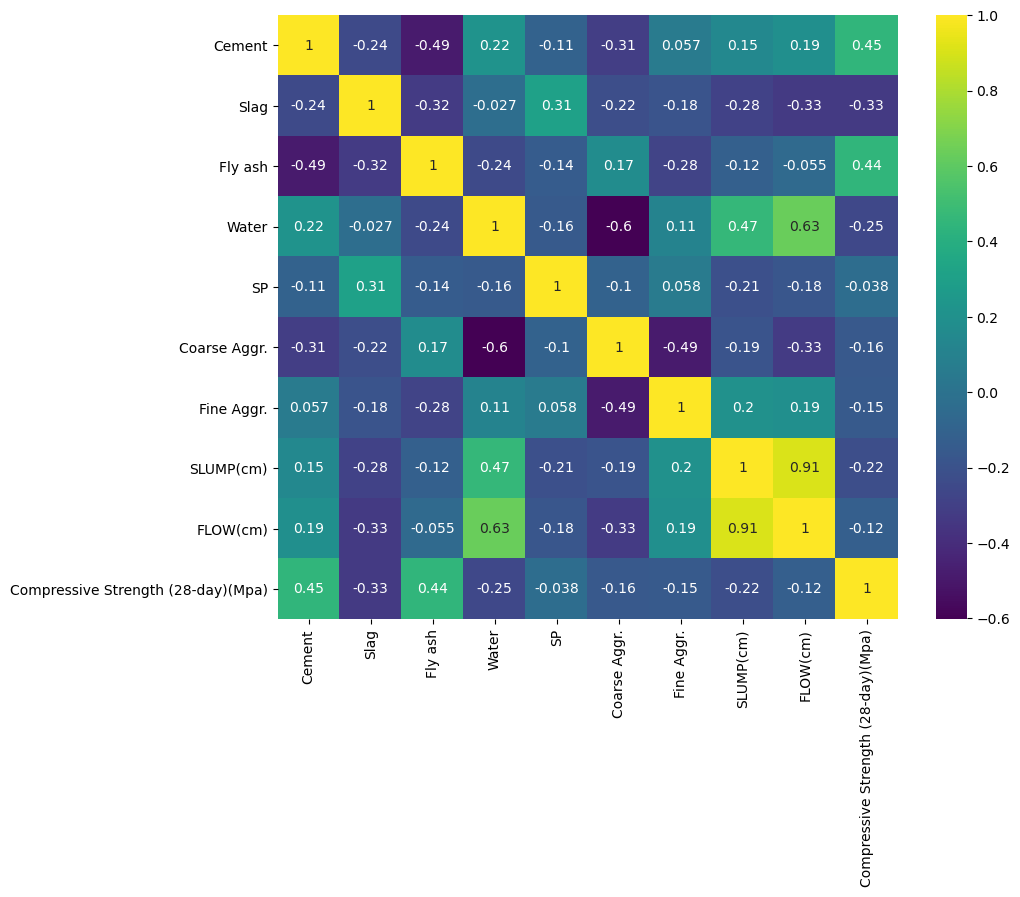

In [7]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),cmap='viridis', annot=True)

In [8]:
correlation = df.corr()['Compressive Strength (28-day)(Mpa)'][:-1]
correlation = pd.DataFrame(correlation).sort_values('Compressive Strength (28-day)(Mpa)')
correlation

,Compressive Strength (28-day)(Mpa)
Slag,-0.331522
Water,-0.254320
SLUMP(cm),-0.223499
Coarse Aggr.,-0.160610
Fine Aggr.,-0.154532
FLOW(cm),-0.124189
SP,-0.037909
Fly ash,0.444380
Cement,0.445656


Text(0, 0.5, 'Compressive Strength')

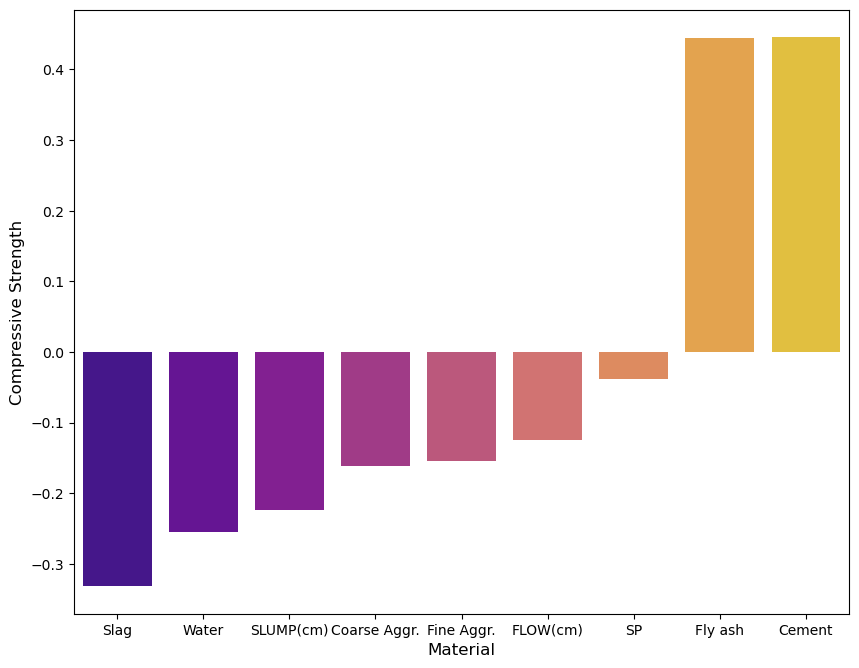

In [9]:
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(data= correlation, x=correlation.index, y='Compressive Strength (28-day)(Mpa)',palette='plasma')
plt.xlabel('Material',fontsize=12)
plt.ylabel('Compressive Strength',fontsize=12)

### Cement and Slag are most correlated with Compressive Strength

In [10]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Train | Test Split

In [11]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [12]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0
...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0


In [13]:
y

0      34.99
1      41.14
2      41.81
3      42.08
4      26.82
       ...  
98     49.97
99     50.23
100    50.50
101    49.17
102    48.70
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling Data using Standard Scaler


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR.

In [19]:
from sklearn.svm import SVR,LinearSVR

In [20]:
svr_model = SVR()

In [21]:
svr_model.fit(scaled_X_train,y_train)

SVR()

In [22]:
prediction = svr_model.predict(scaled_X_test)

## Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
print(f'Average COMPRESSIVE STRENGTH IN y_test is {round(y_test.mean(),2)} Mpa') 

Average COMPRESSIVE STRENGTH IN y_test is 36.27 Mpa


In [25]:
print(f'MEAN SQUARED ERROR IS {round(mean_absolute_error(y_test,prediction),2)} Mpa')

MEAN SQUARED ERROR IS 5.24 Mpa


In [26]:
print(f'ROOT MEAN SQUARED ERROR IS {round(np.sqrt(mean_squared_error(y_test,prediction)),2)} Mpa')

ROOT MEAN SQUARED ERROR IS 6.7 Mpa


In [27]:
error_percent = 100 * np.sqrt(mean_squared_error(y_test,prediction)) / y_test.mean()
print(f'ERROR is {round(error_percent,2)}% based on Root Mean Squared Error')

ERROR is 18.46% based on Root Mean Squared Error


## Grid Search in Attempt for Better Model

In [28]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4,5],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
svr = SVR()
svr_grid = GridSearchCV(svr,param_grid=param_grid)

In [31]:
svr_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [32]:
svr_grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [33]:
prediction = svr_grid.predict(scaled_X_test)

In [34]:
print(f'MEAN SQUARED ERROR IS {round(mean_absolute_error(y_test,prediction),2) } Mpa')

MEAN SQUARED ERROR IS 2.51 Mpa


In [35]:
print(f'ROOT MEAN SQUARED ERROR IS {round(np.sqrt(mean_squared_error(y_test,prediction)),2)} Mpa')

ROOT MEAN SQUARED ERROR IS 3.18 Mpa


In [36]:
error_percent = 100 * np.sqrt(mean_squared_error(y_test,prediction)) / y_test.mean()
print(f'ERROR is {round(error_percent,2)}% based on Root Mean Squared Error')

ERROR is 8.76% based on Root Mean Squared Error


## Great improvement! Decreased Error From 18.46 % down to 8.76%

In [37]:
test_residuals = y_test - prediction

C:\Users\Simran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


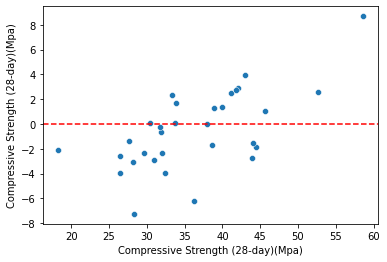

In [38]:
sns.scatterplot(y_test, test_residuals)
plt.axhline(y=0,color= 'r', ls ='dashed')

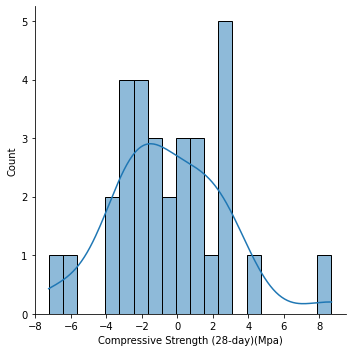

In [39]:
sns.displot(test_residuals, bins=20, kde=True)

In [40]:
import scipy as sp

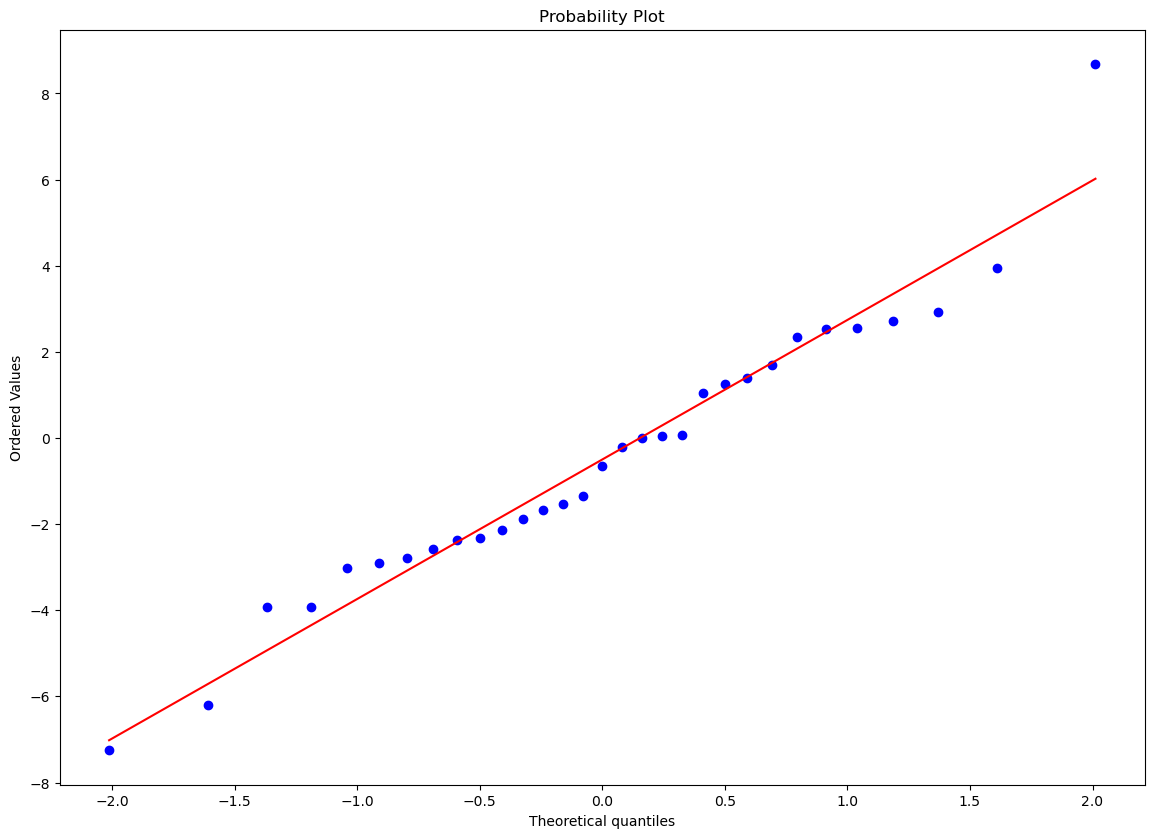

In [41]:
fig ,ax=plt.subplots(figsize=(14,10),dpi = 100)
_ = sp.stats.probplot(test_residuals, plot=ax)


# Now Try Other Algorithms

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
def report(model):
    model.fit(scaled_X_train,y_train)
    prediction = model.predict(scaled_X_test)
    MSE =mean_absolute_error(y_test,prediction)
    RMSE=np.sqrt(mean_squared_error(y_test,prediction))
    print(model.best_params_)
    print(f'MSE is {round(MSE,2)}')
    print(f'RMSE is {round(RMSE,2)}')
    error_percent = 100 * np.sqrt(mean_squared_error(y_test,prediction)) / y_test.mean()
    print(f'ERROR is {round(error_percent,2)}% based on Root Mean Squared Error')

### Finding Polynimial Features

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
scaled_X = scaler.transform(X)

In [46]:
train_error = []
test_error = []
for d in range(1,5):
    # Polynomial complexity
    polynomial_converter = PolynomialFeatures(degree=d, include_bias =False)
    polynomial_features = polynomial_converter.fit_transform(scaled_X)
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)
    
    # Train
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on both Train and Test sets
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
    
    # Error
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_error.append(train_RMSE)
    test_error.append(test_RMSE)

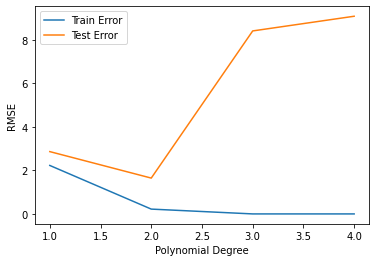

In [47]:
plt.plot(range(1,5),train_error, label='Train Error')
plt.plot(range(1,5),test_error, label= 'Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

### Grid search with Random Forest Regression

In [48]:
param_grid ={'n_estimators':[50,100,150],
             'max_depth': [None,2,3,4,5,6],
             'max_leaf_nodes':[None,2,3,4],
             'bootstrap':[True,False]           
            }

In [49]:
RFR_model= RandomForestRegressor()
RFR_grid = GridSearchCV(RFR_model,param_grid=param_grid)

In [50]:
report(RFR_grid)

{'bootstrap': True, 'max_depth': 5, 'max_leaf_nodes': None, 'n_estimators': 150}
MSE is 3.26
RMSE is 4.26
ERROR is 11.75% based on Root Mean Squared Error


### Grid search with Stochastic Gradient Descent

In [51]:
param_grid ={'penalty':['l2', 'l1', 'elasticnet']
            }

In [52]:
SGDR_model=SGDRegressor()
SGDR_grid = GridSearchCV(SGDR_model,param_grid=param_grid)

In [53]:
report(SGDR_grid)

{'penalty': 'l2'}
MSE is 2.34
RMSE is 2.95
ERROR is 8.14% based on Root Mean Squared Error


### Grid search with KernelRidge

In [54]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
             'degree':[2,3,4,5,6]}

In [55]:
KR_model =KernelRidge()
KR_grid = GridSearchCV(KR_model,param_grid=param_grid)

In [56]:
report(KR_grid)

{'alpha': 100, 'degree': 2}
MSE is 35.84
RMSE is 36.37
ERROR is 100.29% based on Root Mean Squared Error


### Grid search with ElasticNet

In [57]:
param_grid={'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [58]:
EN_model=ElasticNet()
EN_grid = GridSearchCV(EN_model,param_grid=param_grid,cv=5)

In [59]:
report(EN_grid)

{'alpha': 0.1, 'l1_ratio': 1}
MSE is 2.54
RMSE is 3.17
ERROR is 8.73% based on Root Mean Squared Error


#### Lasso Regression

In [60]:
from sklearn.linear_model import LassoCV

In [61]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [62]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [63]:
def report(model):
    model.fit(scaled_X_train,y_train)
    prediction = model.predict(scaled_X_test)
    MSE =mean_absolute_error(y_test,prediction)
    RMSE=np.sqrt(mean_squared_error(y_test,prediction))
    print(f'MSE is {round(MSE,2)}')
    print(f'RMSE is {round(RMSE,2)}')
    error_percent = 100 * np.sqrt(mean_squared_error(y_test,prediction)) / y_test.mean()
    print(f'ERROR is {round(error_percent,2)}% based on Root Mean Squared Error')

In [64]:
report(lasso_cv_model)

MSE is 3.17
RMSE is 3.83
ERROR is 10.57% based on Root Mean Squared Error


### Linear Regression

In [65]:
LR_model=LinearRegression()

In [66]:
report(LR_model)

MSE is 2.31
RMSE is 2.86
ERROR is 7.89% based on Root Mean Squared Error


# Conclusion

### Best Model is Linear Regression
### MSE is 2.3 Mpa
### RMSE is 2.8 MPa
### ERROR is 7.89% based on Root Mean Squared Error

In [67]:
final_model = LinearRegression()

In [68]:
model.fit(scaled_X_train,y_train)

LinearRegression()

In [69]:
prediction = model.predict(scaled_X_test)

In [70]:
MSE =mean_absolute_error(y_test,prediction)
RMSE=np.sqrt(mean_squared_error(y_test,prediction))
print(f'MSE is {round(MSE,2)} Mpa')
print(f'RMSE is {round(RMSE,2)} Mpa')
error_percent = 100 * np.sqrt(mean_squared_error(y_test,prediction)) / y_test.mean()
print(f'ERROR is {round(error_percent,2)}% based on Root Mean Squared Error')

MSE is 2.31 Mpa
RMSE is 2.86 Mpa
ERROR is 7.89% based on Root Mean Squared Error


In [71]:
test_residuals = y_test - prediction

C:\Users\Simran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


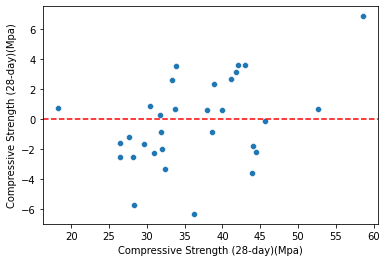

In [72]:
sns.scatterplot(y_test, test_residuals)
plt.axhline(y=0,color= 'r', ls ='dashed')

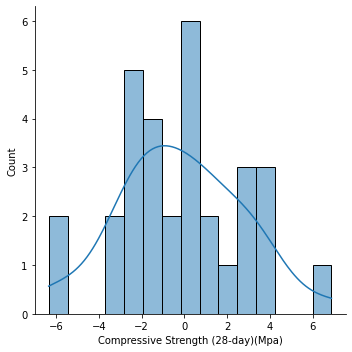

In [73]:
sns.displot(test_residuals, bins=15, kde=True)

In [74]:
import scipy as sp

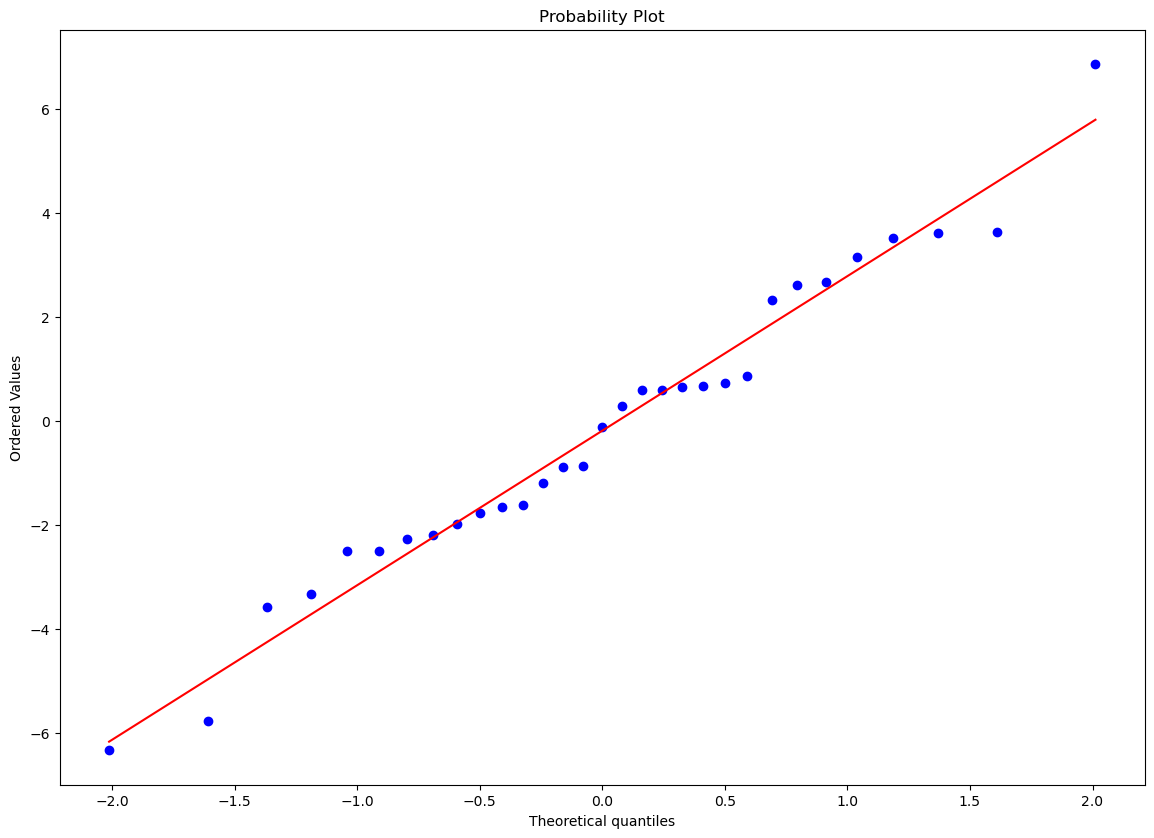

In [75]:
fig ,ax=plt.subplots(figsize=(14,10),dpi = 100)
_ = sp.stats.probplot(test_residuals, plot=ax)


# Final Model Persistance

In [76]:
final_model = LinearRegression()

In [77]:
scaled_X = scaler.transform(X)

In [78]:
final_model.fit(scaled_X,y)

LinearRegression()

In [79]:
final_model.coef_

array([ 4.29240741, -1.88382984,  3.78291116, -4.49681389,  0.07745511,
       -4.7916644 , -2.65606725, -2.06435147,  1.4803291 ])

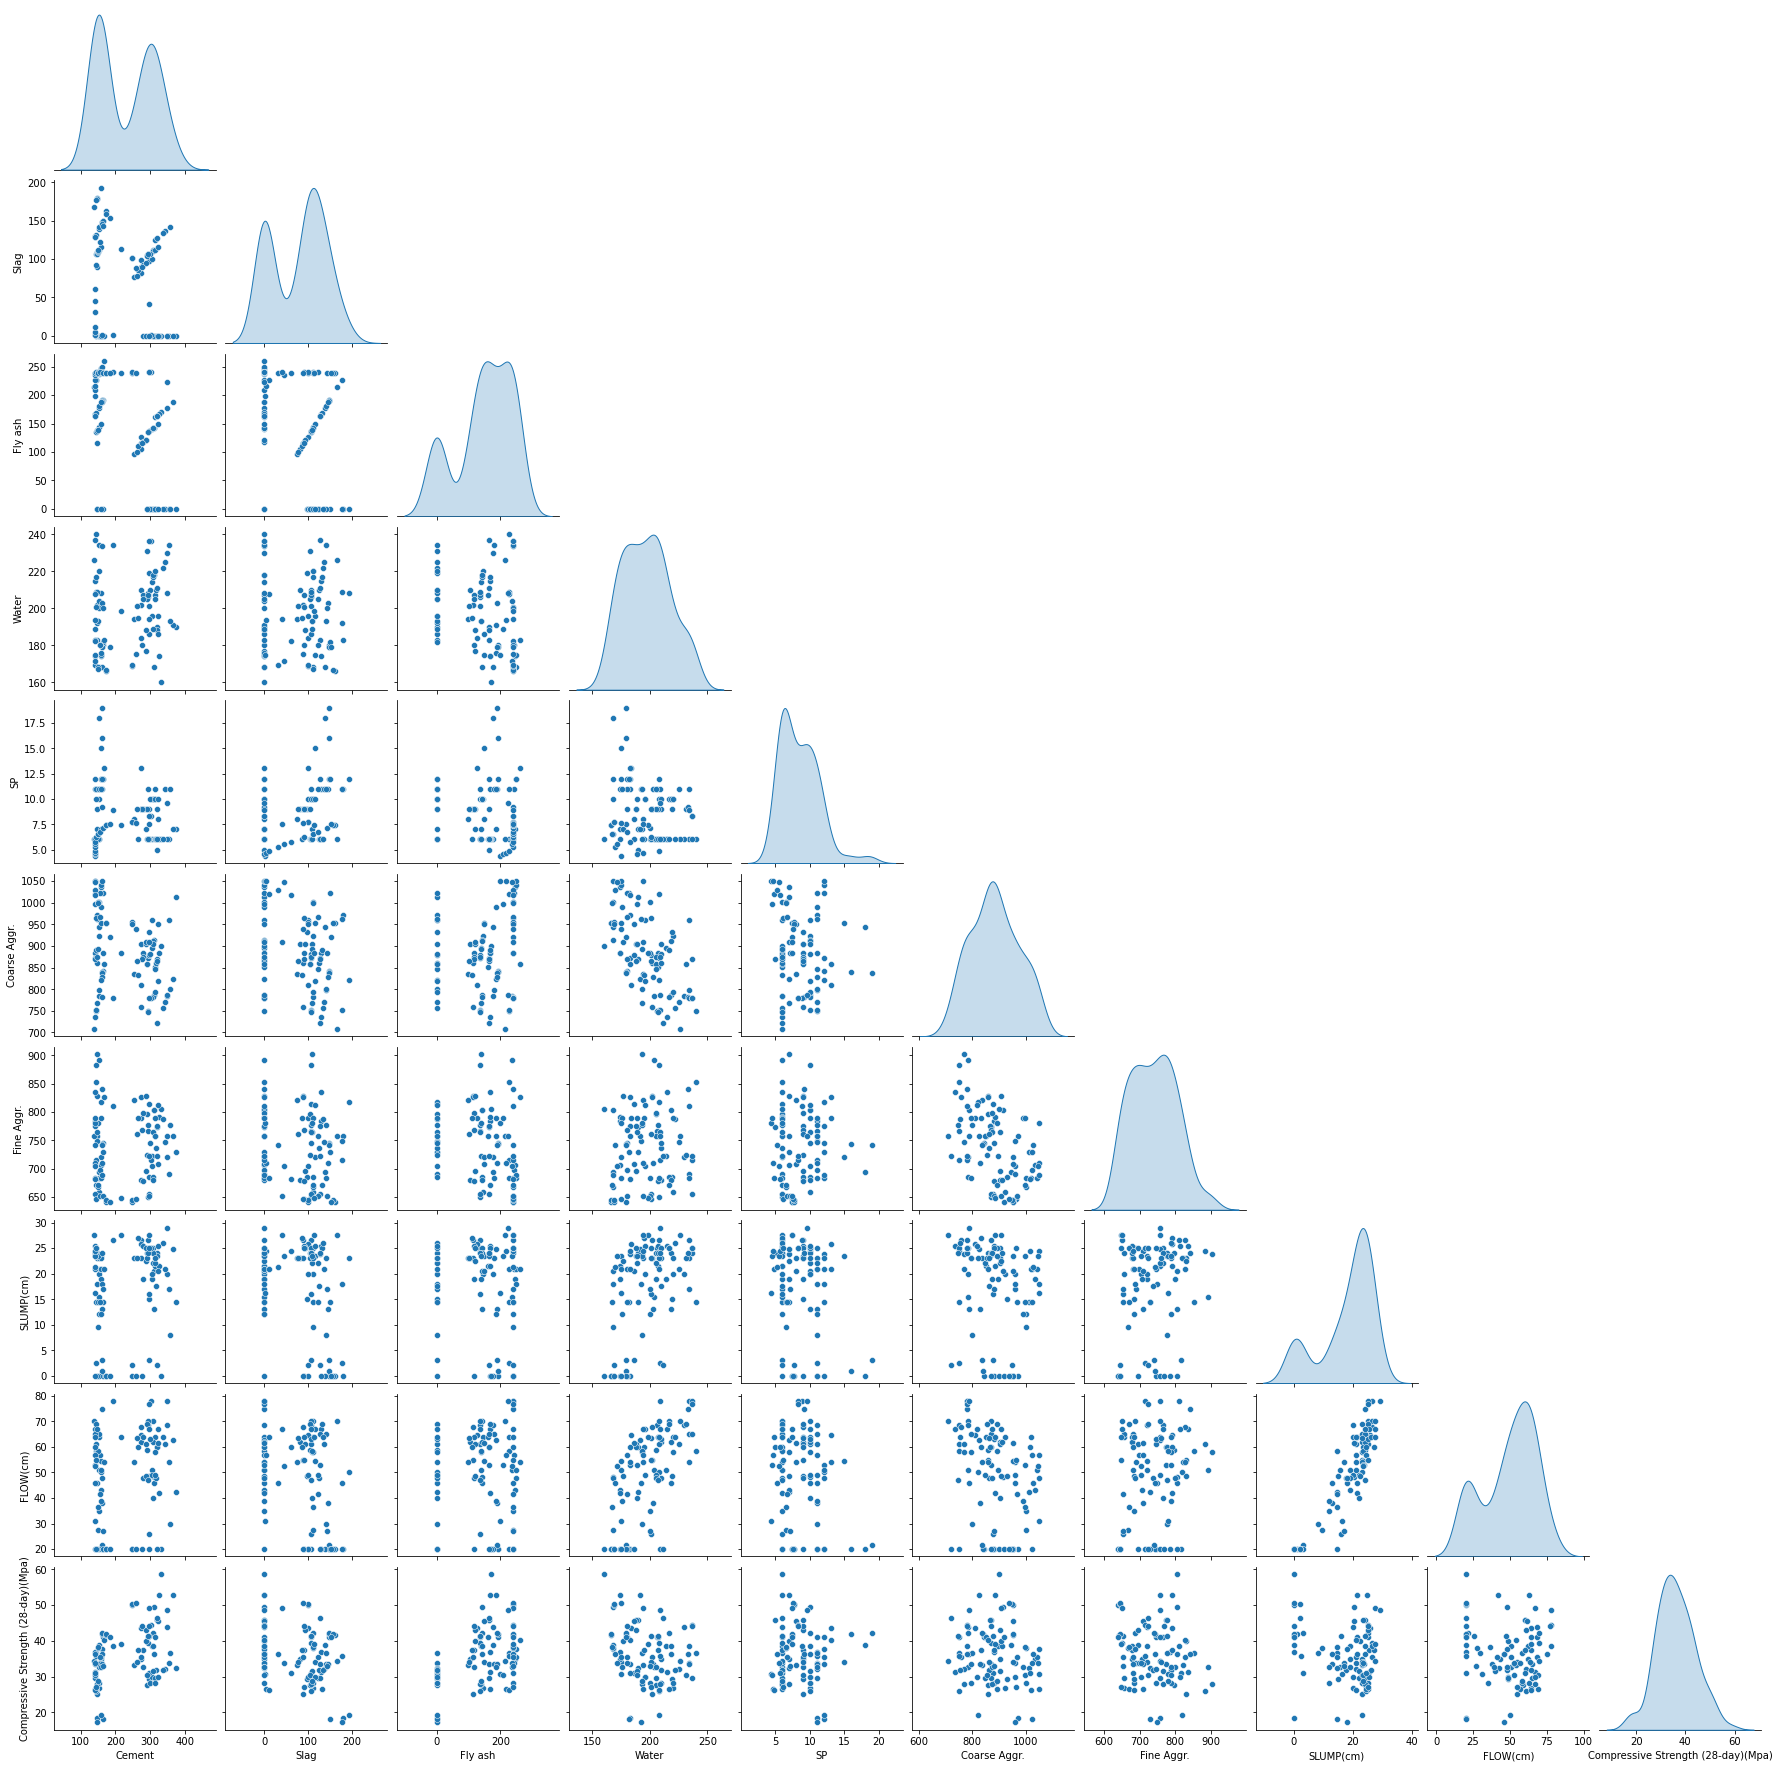

In [80]:
sns.pairplot(df, corner =True, diag_kind ='kde')

# Save  Model

In [81]:
import joblib

In [82]:
joblib.dump(final_model,"final_concrete.joblib")

['final_concrete.joblib']

In [83]:
joblib.dump(scaler,'final_concrete_scaler.joblib')

['final_concrete_scaler.joblib']

# Load Model

In [84]:
loaded_model = joblib.load("final_concrete.joblib")

In [85]:
loaded_scaler = joblib.load("final_concrete_scaler.joblib")

# TEST WITH M.L MODEL

In [96]:
X.iloc[50] # Feature Sample from iloc 50

Cement          320.0
Slag              0.0
Fly ash         163.0
Water           188.0
SP                9.0
Coarse Aggr.    866.0
Fine Aggr.      776.0
SLUMP(cm)        23.5
FLOW(cm)         60.0
Name: 50, dtype: float64

In [97]:
y.iloc[50] # Label Sample from iloc 50

45.69

In [98]:
random_iloc50_sample = [[320,0,163,188,9,866,776,23.5,60]]

In [99]:
scaled_data = loaded_scaler.transform(random_iloc50_sample)
scaled_data # Scale Data

array([[ 1.36061539, -1.43400725,  0.09451861, -0.45259205,  0.24076403,
        -0.16432242,  0.5130737 ,  0.612351  ,  0.58652273]])

In [100]:
loaded_model.predict(scaled_data) # RESULT

array([45.90616987])

# Result is accurate and Final Model is good for API

# ***********End*************